In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [2]:
!wget -q "https://raw.githubusercontent.com/EduardoFontouraDias/Obesity/main/ObesityDataSet_raw_and_data_sinthetic.csv" -O obesity.csv

In [3]:
with open(file='/content/obesity.csv',mode='r',encoding='utf8') as fp:
  dados = pd.read_csv(fp,sep=",")

| Variable Name               | Descrição                                                                         |
| --------------------------- | ---------------------------------------------------------------------------------- |
| Gender                      | Gênero                                                                           |
| Age                         | Idade                                                                            |
| Height                      | Altura                                                                           |
| Weight                      | Peso                                                                             |
| family_history_with_overweight | Tem algum membro da família que sofre ou sofreu de sobrepeso?                     |
| FAVC                        | Frequentemente consome alimentos calóricos?                                       |
| FCVC                        | Costuma comer vegetais nas refeições?                                              |
| NCP                         | Quantas refeições principais você faz diariamente?                                 |
| CAEC                        | Come algum alimento entre as refeições?                                            |
| SMOKE                       | Fuma?                                                                            |
| CH2O                        | Quantos litros de água você bebe diariamente?                                                |
| SCC                         | Monitora as calorias que consome diariamente?                                     |
| FAF                         | Com que frequência pratica atividade física?                                       |
| TUE                         | Quanto tempo você utiliza dispositivos tecnológicos, como celular, videogames, etc.? |
| CALC                        | Com que frequência consome álcool?                                                |
| MTRANS                      | Qual meio de transporte você usa com mais frequência?                              |
| NObeyesdad                  | Nível de obesidade  

### **1.1. Analise exploratoria**

In [4]:
dados.shape

(2111, 17)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
dados.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


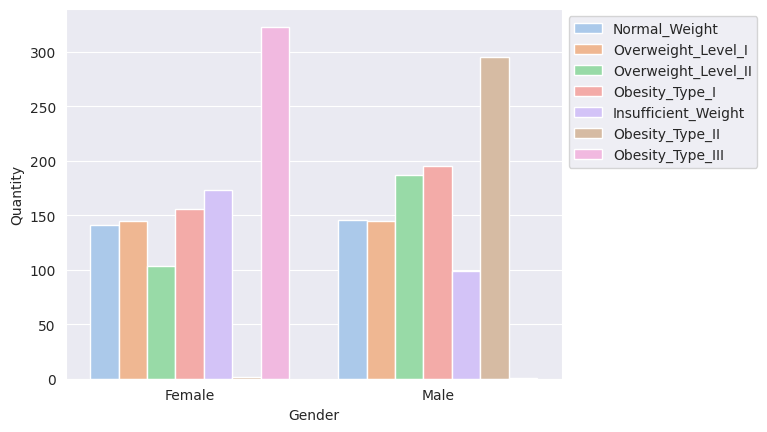

In [7]:
with sns.axes_style('darkgrid'):
  grafico_obesidade = sns.countplot(data=dados,x="Gender",hue="NObeyesdad",palette="pastel")
  grafico_obesidade.legend(loc='upper left',bbox_to_anchor=(1,1))
  grafico_obesidade.set_ylabel('Quantity')

Vemos que a quantidade de homens e mulheres que possuem é parecida em que estão com peso normal ou sobrepeso nível 1. Porém a maioria das mulheres possuem grau de obesidade tipo III e os homens se concentram no grau de obesidade tipo II, provavelmente isso se destaca pela diferença de biotipo entre homem e mulher.

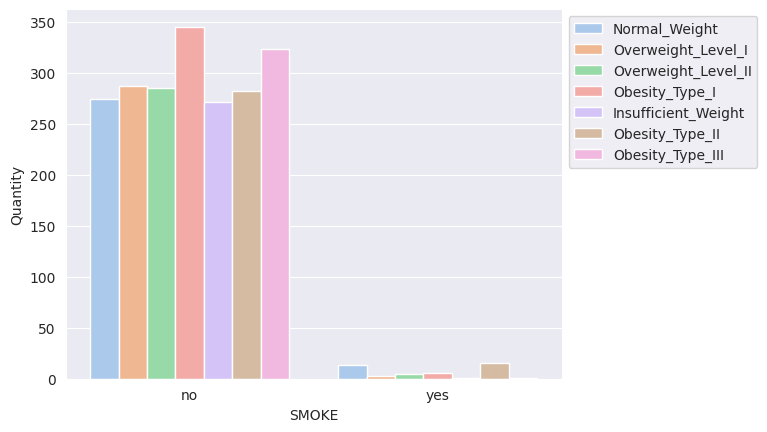

In [8]:
with sns.axes_style('darkgrid'):
  grafico_smoke = sns.countplot(data=dados,x="SMOKE",hue="NObeyesdad",palette="pastel")
  grafico_smoke.legend(loc='upper left',bbox_to_anchor=(1,1))
  grafico_smoke.set_ylabel('Quantity')

Podemos ver a quantidade de pessoas que fumam da pesquisa são baixas e não tem muita relação com o grau de obesidade.

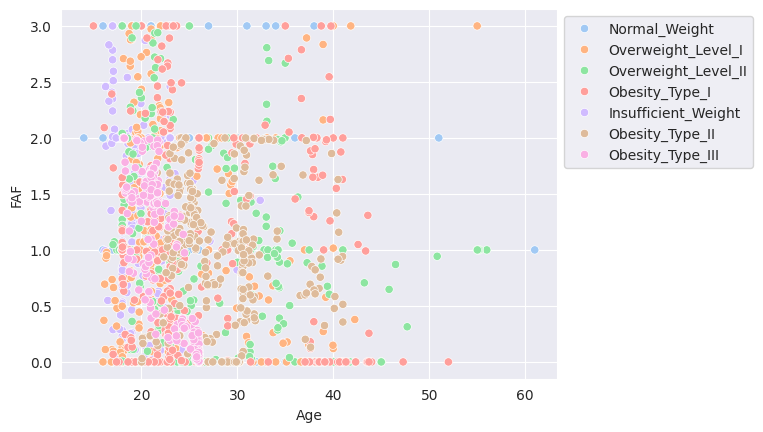

In [9]:
with sns.axes_style('darkgrid'):
  grafico_age_faf = sns.scatterplot(data=dados,x="Age",y="FAF",hue="NObeyesdad",palette="pastel")
  grafico_age_faf.legend(loc='upper left',bbox_to_anchor=(1,1))

Aqui podemos ver que as pessoas que possuem maior grau de obesidade(Obesidade tipo I e II) são mais novas e menos praticam atividade físicas e com a mesma idade, porém com maior frequência de atividade física apresenta maior taxa de pessoas com um peso normal. A medida que a idade aumenta, o grau de obesidade também aumenta, mesmo com a pratica de atividades físicas.

## **2\. Dados**

### **2.1. Valores nulos**

In [10]:
#Verificação se existem dados faltantes
dados.count().isnull()

Gender                            False
Age                               False
Height                            False
Weight                            False
family_history_with_overweight    False
FAVC                              False
FCVC                              False
NCP                               False
CAEC                              False
SMOKE                             False
CH2O                              False
SCC                               False
FAF                               False
TUE                               False
CALC                              False
MTRANS                            False
NObeyesdad                        False
dtype: bool

In [11]:
#Pelo resultado vemos que não possui dados faltantes, mas faremos um contador de linha
contador_de_linhas = 0
contador_total_de_linhas = 0
for dado in dados:
  contador_total_de_linhas =+ 1
  if pd.isnull(dado):
    contador_de_linhas =+ 1
perc_null = contador_de_linhas*100/contador_total_de_linhas
print(f'O dado possui um total de {contador_de_linhas} linhas em branco, ou seja {perc_null} % em branco')


O dado possui um total de 0 linhas em branco, ou seja 0.0 % em branco


### **2.2. Variáveis categóricas**

Será identificado as variáveis categóricas nominais e ordinais, e criado uma nova coluna aplicando método de one-hot e terá o mesmo nome da coluna original acrescidade do seu prefixo. Por definição, árvores de decisão **não precisam** da transformação de atributos categóricos em numéricos. Contudo, por **limitação** do pacote Python Scikit Learn, devemos conduzir esta etapa. Não será tratado a variável resposta

In [12]:
#Transformando as variáveis categóricas em númericas
contagem_por_grupo_sex = dados.groupby(['Gender']).size().reset_index(name='contagem')
print(contagem_por_grupo_sex)
print('\n')
contagem_por_grupo_family_history = dados.groupby(['family_history_with_overweight']).size().reset_index(name='contagem')
print(contagem_por_grupo_family_history)
print('\n')
contagem_por_grupo_CAEC = dados.groupby(['CAEC']).size().reset_index(name='contagem')
print(contagem_por_grupo_CAEC)
print('\n')
contagem_por_grupo_SMOKE = dados.groupby(['SMOKE']).size().reset_index(name='contagem')
print(contagem_por_grupo_SMOKE)
print('\n')
contagem_por_grupo_CALC = dados.groupby(['CALC']).size().reset_index(name='contagem')
print(contagem_por_grupo_CALC)
print('\n')
contagem_por_grupo_SCC = dados.groupby(['SCC']).size().reset_index(name='contagem')
print(contagem_por_grupo_SCC)
print('\n')
contagem_por_grupo_MTRANS = dados.groupby(['MTRANS']).size().reset_index(name='contagem')
print(contagem_por_grupo_MTRANS)
print('\n')
contagem_por_grupo_FAVC = dados.groupby(['FAVC']).size().reset_index(name='contagem')
print(contagem_por_grupo_FAVC)
print('\n')

   Gender  contagem
0  Female      1043
1    Male      1068


  family_history_with_overweight  contagem
0                             no       385
1                            yes      1726


         CAEC  contagem
0      Always        53
1  Frequently       242
2   Sometimes      1765
3          no        51


  SMOKE  contagem
0    no      2067
1   yes        44


         CALC  contagem
0      Always         1
1  Frequently        70
2   Sometimes      1401
3          no       639


   SCC  contagem
0   no      2015
1  yes        96


                  MTRANS  contagem
0             Automobile       457
1                   Bike         7
2              Motorbike        11
3  Public_Transportation      1580
4                Walking        56


  FAVC  contagem
0   no       245
1  yes      1866




In [13]:
one_hot_gender = pd.get_dummies(dados['Gender'])
one_hot_family_history_with_overweight = pd.get_dummies(dados['family_history_with_overweight'],prefix='family_history_with_overweight')
one_hot_CAEC = pd.get_dummies(dados['CAEC'],prefix='CAEC')
one_hot_SMOKE = pd.get_dummies(dados['SMOKE'],prefix='SMOKE')
one_hot_SCC = pd.get_dummies(dados['SCC'],prefix='SCC')
one_hot_MTRANS = pd.get_dummies(dados['MTRANS'])
one_hot_FAVC = pd.get_dummies(dados['FAVC'],prefix='FAVC')
one_hot_CALC = pd.get_dummies(dados['CALC'],prefix='CALC')

In [14]:
#Faremos a etapa de concatenação e renomeação das colunas.
dados = pd.concat([dados,one_hot_gender,one_hot_family_history_with_overweight,one_hot_CAEC,one_hot_SMOKE,one_hot_SCC,one_hot_MTRANS,one_hot_FAVC,one_hot_CALC],axis=1)

In [15]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [16]:
dados.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Female,Male,family_history_with_overweight_no,family_history_with_overweight_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,Automobile,Bike,Motorbike,Public_Transportation,Walking,FAVC_no,FAVC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0


In [17]:
novos_nomes = {'CALC_Always':'Alchool_Always','CALC_Frequently':'Alchool_Frequently','CALC_Sometimes':'Alchool_Sometimes','CALC_no':'Alchool_no','FAVC_no':'Ingest_high_calories_no','FAVC_yes':'Ingest_high_calories_yes',
               'SCC_yes':'Monitor_calories_yes','SCC_no':'Monitor_calories_no','CAEC_Always':'Eat_between_meals_Always','CAEC_Sometimes':'Eat_between_meals_Sometimes','CAEC_no':'Eat_between_meals_No','CAEC_Frequently':'Eat_between_meals_Sometimes'}

In [18]:
dados = dados.rename(columns=novos_nomes)

### **2.3. Limpeza**

Será descartado as colunas categóricas originais e mantenha a variável resposta na primeira coluna do dataframe.

In [19]:
colunas_que_serao_deletadas = ['Gender','family_history_with_overweight','CAEC','SMOKE','SCC','MTRANS','FAVC','CALC']

In [20]:
dados = dados.drop(columns=colunas_que_serao_deletadas)

In [21]:
dados.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Female,Male,family_history_with_overweight_no,family_history_with_overweight_yes,Eat_between_meals_Always,Eat_between_meals_Sometimes,Eat_between_meals_Sometimes,Eat_between_meals_No,SMOKE_no,SMOKE_yes,Monitor_calories_no,Monitor_calories_yes,Automobile,Bike,Motorbike,Public_Transportation,Walking,Ingest_high_calories_no,Ingest_high_calories_yes,Alchool_Always,Alchool_Frequently,Alchool_Sometimes,Alchool_no
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0


### **2.4. Treino/Teste**

Será separado a base de dados em treino e teste utilizando uma proporção de 3/4 para treino e 1/4 para testes.

In [22]:
x_train,x_test,y_train,y_test = train_test_split(dados.drop(['NObeyesdad'],axis=1),dados['NObeyesdad'],test_size=(1/4),random_state=123)

In [23]:
y_train.head()

1376         Obesity_Type_I
605     Insufficient_Weight
1879       Obesity_Type_III
156           Normal_Weight
1868       Obesity_Type_III
Name: NObeyesdad, dtype: object

In [24]:
y_test.head()

600     Insufficient_Weight
1934       Obesity_Type_III
1586        Obesity_Type_II
1027    Overweight_Level_II
1758        Obesity_Type_II
Name: NObeyesdad, dtype: object

In [25]:
x_train.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Female,Male,family_history_with_overweight_no,family_history_with_overweight_yes,Eat_between_meals_Always,Eat_between_meals_Sometimes,Eat_between_meals_Sometimes,Eat_between_meals_No,SMOKE_no,SMOKE_yes,Monitor_calories_no,Monitor_calories_yes,Automobile,Bike,Motorbike,Public_Transportation,Walking,Ingest_high_calories_no,Ingest_high_calories_yes,Alchool_Always,Alchool_Frequently,Alchool_Sometimes,Alchool_no
1376,25.920738,1.823755,105.800158,2.92711,3.0,2.151496,1.166064,1.509831,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0
605,19.407204,1.520862,42.000000,3.00000,1.0,1.848703,0.000000,0.744555,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0
1879,19.262934,1.741014,132.579270,3.00000,3.0,2.436261,1.464674,0.870920,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0
156,35.000000,1.530000,45.000000,3.00000,3.0,1.000000,0.000000,1.000000,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1
1868,26.000000,1.638836,110.970479,3.00000,3.0,2.644135,0.000000,0.357581,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0


In [26]:
x_test.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Female,Male,family_history_with_overweight_no,family_history_with_overweight_yes,Eat_between_meals_Always,Eat_between_meals_Sometimes,Eat_between_meals_Sometimes,Eat_between_meals_No,SMOKE_no,SMOKE_yes,Monitor_calories_no,Monitor_calories_yes,Automobile,Bike,Motorbike,Public_Transportation,Walking,Ingest_high_calories_no,Ingest_high_calories_yes,Alchool_Always,Alchool_Frequently,Alchool_Sometimes,Alchool_no
600,19.010211,1.555431,44.188767,2.724285,3.000000,1.000000,1.070331,0.000000,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
1934,25.783865,1.643111,109.910012,3.000000,3.000000,1.530992,0.015860,0.445495,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0
1586,25.509034,1.772190,114.097656,2.193310,3.000000,2.089983,1.360994,0.857438,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0
1027,33.690239,1.681842,77.426465,3.000000,2.679724,1.999737,1.747347,0.681773,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1
1758,24.186273,1.794827,120.919703,2.611847,2.749334,2.364849,1.141708,0.063005,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0


## 3\. Modelagem

### **3.1. Treino**

Treino do modelo de **árvore de decisão** com os **dados de treino** (3/4). Será plotado o gráfico da árvore do modelo treinado com suas folhas.

In [27]:
model = DecisionTreeClassifier()

In [28]:
model = model.fit(x_train,y_train)

In [29]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
        'Female', 'Male', 'family_history_with_overweight_no',
        'family_history_with_overweight_yes', 'Eat_between_meals_Always',
        'Eat_between_meals_Sometimes', 'Eat_between_meals_Sometimes',
        'Eat_between_meals_No', 'SMOKE_no', 'SMOKE_yes',
        'Monitor_calories_no', 'Monitor_calories_yes', 'Automobile',
        'Bike', 'Motorbike', 'Public_Transportation', 'Walking',
        'Ingest_high_calories_no', 'Ingest_high_calories_yes',
        'Alchool_Always', 'Alchool_Frequently', 'Alchool_Sometimes',
        'Alchool_no'], dtype=object),
 'n_features_in_': 31,
 'n_outputs_': 1,
 'classe

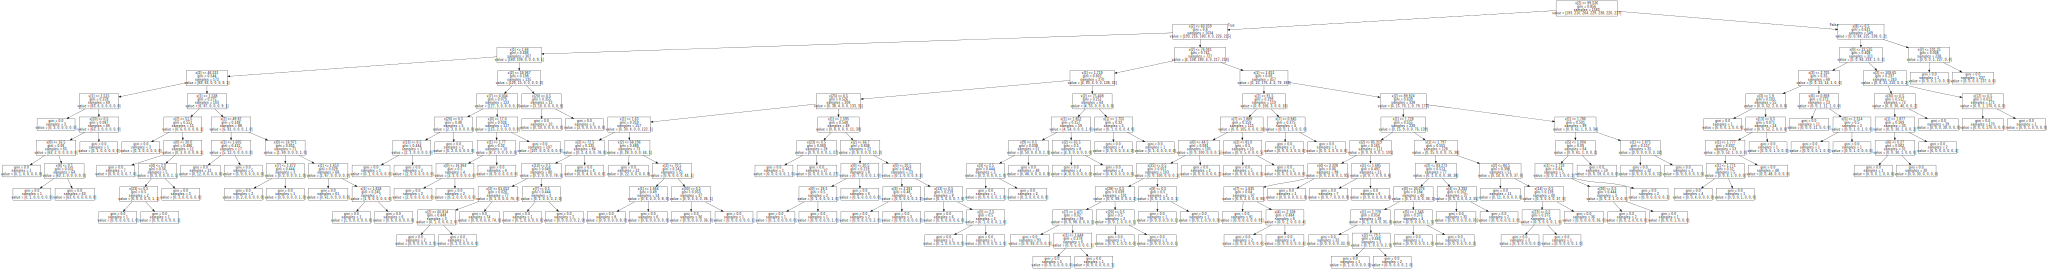

In [30]:
arvore_dados = tree.export_graphviz(model,out_file=None)
graph = graphviz.Source(arvore_dados)
graph

In [31]:
graph.render('Arvore_de_Decisao', format='png',cleanup=True)

'Arvore_de_Decisao.png'

### **3.2. Avaliação**

Será calculado e visualizado a **matriz de confusão** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/4).

In [32]:
y_predicted = model.predict(x_test)

In [33]:
y_predicted[0:5]

array(['Insufficient_Weight', 'Obesity_Type_III', 'Obesity_Type_II',
       'Overweight_Level_II', 'Obesity_Type_II'], dtype=object)

In [34]:
y_predicted.shape

(528,)

In [35]:
conf_matrix = confusion_matrix(y_test,y_predicted)
print(conf_matrix)

[[75  4  0  0  0  0  0]
 [ 3 60  0  0  0  7  1]
 [ 0  0 73  5  0  0  9]
 [ 0  0  1 67  0  0  0]
 [ 0  0  0  0 86  0  0]
 [ 0  4  0  0  0 57  3]
 [ 0  0  0  0  0  2 71]]


Text(0.5, 1.0, 'Matriz de Confusão')

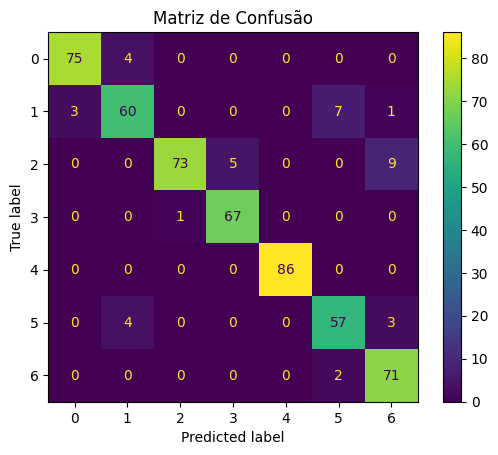

In [36]:
map_confusion = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=None)
map_confusion.plot()
plt.title('Matriz de Confusão')

Acurácia:

In [37]:
total = conf_matrix.sum()
print(total)

528


In [38]:
acertos = np.diag(conf_matrix).sum()
print(acertos)

489


In [39]:
acuracia = 100*acertos/total
print(round(acuracia,2),'%')

92.61 %


## 4\. Predição  

### **4.1. Novo Paciente**

Qual o grau de obesidade do paciente que possui com as seguintes características:

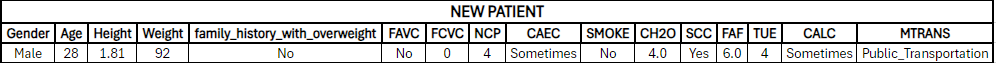

In [40]:
x_train.head(1)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Female,Male,family_history_with_overweight_no,family_history_with_overweight_yes,Eat_between_meals_Always,Eat_between_meals_Sometimes,Eat_between_meals_Sometimes,Eat_between_meals_No,SMOKE_no,SMOKE_yes,Monitor_calories_no,Monitor_calories_yes,Automobile,Bike,Motorbike,Public_Transportation,Walking,Ingest_high_calories_no,Ingest_high_calories_yes,Alchool_Always,Alchool_Frequently,Alchool_Sometimes,Alchool_no
1376,25.920738,1.823755,105.800158,2.92711,3.0,2.151496,1.166064,1.509831,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0


In [45]:
new_patient = np.array([28,1.81,92,0,4,4,6.0,4,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,1,1,0,0,0,1,0])

In [46]:
grau_de_obesidade = model.predict(new_patient.reshape(1,-1))
print(grau_de_obesidade)

['Overweight_Level_II']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
